# Non-Negative Matrix Factorization for Face Images

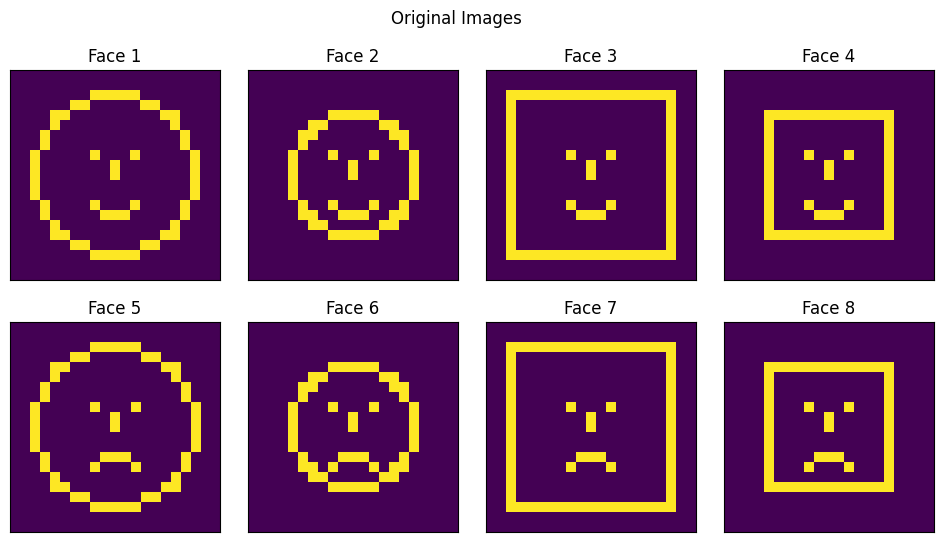

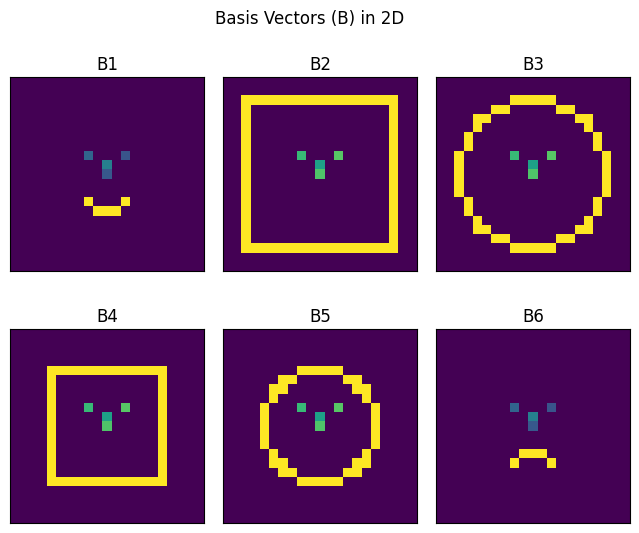

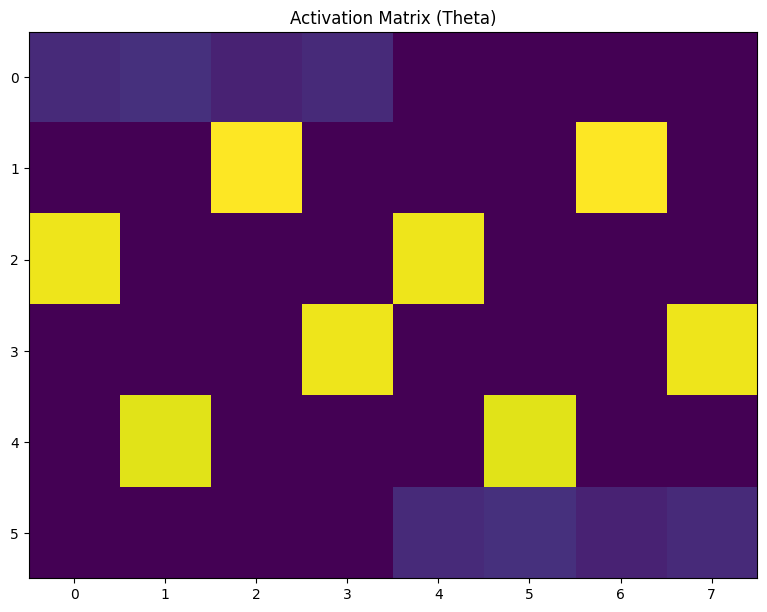

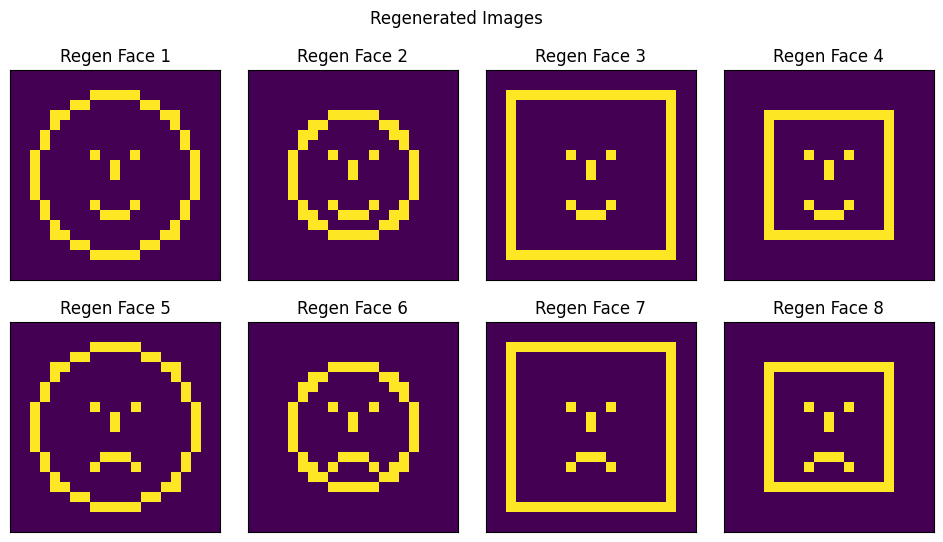

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as LA
import scipy.io.wavfile as wav
import librosa
from IPython.display import Audio


def B_update(B, T, X):
    ones = np.ones((len(B), len(B)))
    BT = np.dot(B, T)
    Tt = np.transpose(T)
    num1 = np.divide(X, BT + 1e-20)
    num = np.dot(num1, Tt)
    B = B * num

    den = np.dot(ones, B)
    B = np.divide(B, den + 1e-20)

    return B


def T_update(B, T, X):
    ones = np.ones((len(B[0]), len(B[0])))
    BT = np.dot(B, T)
    Bt = np.transpose(B)
    num1 = np.divide(X, BT + 1e-20)
    num = np.dot(Bt, num1)
    T = num * T

    den = np.dot(ones, T)
    T = np.divide(T, den + 1e-20)

    return T


def cost_fun(X, X_hat):
    E = np.abs(X-X_hat)
    return np.average(E)


if __name__ == '__main__':

    faces = np.load('/content/faces.npy')

    face1 = np.reshape(faces[:, 0], (21, 21))
    face2 = np.reshape(faces[:, 1], (21, 21))
    face3 = np.reshape(faces[:, 2], (21, 21))
    face4 = np.reshape(faces[:, 3], (21, 21))
    face5 = np.reshape(faces[:, 4], (21, 21))
    face6 = np.reshape(faces[:, 5], (21, 21))
    face7 = np.reshape(faces[:, 6], (21, 21))
    face8 = np.reshape(faces[:, 7], (21, 21))

    fig, axs = plt.subplots(2, 4, figsize=(12, 6))
    axs[0, 0].imshow(face1)
    axs[0, 1].imshow(face2)
    axs[0, 2].imshow(face3)
    axs[0, 3].imshow(face4)
    axs[1, 0].imshow(face5)
    axs[1, 1].imshow(face6)
    axs[1, 2].imshow(face7)
    axs[1, 3].imshow(face8)

    axs[0, 0].set_title('Face 1')
    axs[0, 1].set_title('Face 2')
    axs[0, 2].set_title('Face 3')
    axs[0, 3].set_title('Face 4')
    axs[1, 0].set_title('Face 5')
    axs[1, 1].set_title('Face 6')
    axs[1, 2].set_title('Face 7')
    axs[1, 3].set_title('Face 8')

    for ax in axs.flat:
        ax.set_xticks([])
        ax.set_yticks([])
    
    fig.suptitle('Original Images')

    plt.subplots_adjust(wspace=0.1, hspace=0.2)
    plt.show()

    print('\n')

    K = 6

    seed_value = 1 
    rng = np.random.default_rng(seed_value)
    lower_bound = 0.0
    upper_bound = 1.0
    B = rng.uniform(lower_bound, upper_bound, size=(len(faces), K))
    T = rng.uniform(lower_bound, upper_bound, size=(K, len(faces[0])))

    tol = 1e-2
    max_iteration = 600

    for i in range(max_iteration):
        B = B_update(B, T, faces)
        T = T_update(B, T, faces)
        S_hat = np.dot(B, T)
        error = cost_fun(faces, S_hat)
        if error < tol:
            break

    ## B => 441 x K
    ## T =>   K x 8

    B1 = np.reshape(B[:, 0], (21, 21))
    B2 = np.reshape(B[:, 1], (21, 21))
    B3 = np.reshape(B[:, 2], (21, 21))
    B4 = np.reshape(B[:, 3], (21, 21))
    B5 = np.reshape(B[:, 4], (21, 21))
    B6 = np.reshape(B[:, 5], (21, 21))

    fig, axs1 = plt.subplots(2, 3, figsize=(8, 6))
    axs1[0, 0].imshow(B1)
    axs1[0, 1].imshow(B2)
    axs1[0, 2].imshow(B3)
    axs1[1, 0].imshow(B4)
    axs1[1, 1].imshow(B5)
    axs1[1, 2].imshow(B6)

    axs1[0, 0].set_title('B1')
    axs1[0, 1].set_title('B2')
    axs1[0, 2].set_title('B3')
    axs1[1, 0].set_title('B4')
    axs1[1, 1].set_title('B5')
    axs1[1, 2].set_title('B6')

    for ax in axs1.flat:
        ax.set_xticks([])
        ax.set_yticks([])
    
    fig.suptitle('Basis Vectors (B) in 2D')

    plt.subplots_adjust(wspace=0.1, hspace=0.2)

    print('\n')

    plt.figure(figsize=(9.4, 7.8))
    plt.title('Activation Matrix (Theta)')
    plt.imshow(T)

    plt.show()

    print('\n')

    X_hat = np.dot(B, T) # 441 x 8

    X_hat1 = np.reshape(X_hat[:, 0], (21, 21))
    X_hat2 = np.reshape(X_hat[:, 1], (21, 21))
    X_hat3 = np.reshape(X_hat[:, 2], (21, 21))
    X_hat4 = np.reshape(X_hat[:, 3], (21, 21))
    X_hat5 = np.reshape(X_hat[:, 4], (21, 21))
    X_hat6 = np.reshape(X_hat[:, 5], (21, 21))
    X_hat7 = np.reshape(X_hat[:, 6], (21, 21))
    X_hat8 = np.reshape(X_hat[:, 7], (21, 21))

    fig, axs = plt.subplots(2, 4, figsize=(12, 6))
    axs[0, 0].imshow(X_hat1)
    axs[0, 1].imshow(X_hat2)
    axs[0, 2].imshow(X_hat3)
    axs[0, 3].imshow(X_hat4)
    axs[1, 0].imshow(X_hat5)
    axs[1, 1].imshow(X_hat6)
    axs[1, 2].imshow(X_hat7)
    axs[1, 3].imshow(X_hat8)

    axs[0, 0].set_title('Regen Face 1')
    axs[0, 1].set_title('Regen Face 2')
    axs[0, 2].set_title('Regen Face 3')
    axs[0, 3].set_title('Regen Face 4')
    axs[1, 0].set_title('Regen Face 5')
    axs[1, 1].set_title('Regen Face 6')
    axs[1, 2].set_title('Regen Face 7')
    axs[1, 3].set_title('Regen Face 8')

    for ax in axs.flat:
        ax.set_xticks([])
        ax.set_yticks([])

    fig.suptitle('Regenerated Images')

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.1, hspace=0.2)

    plt.show()
